In [1]:
import matplotlib as mpl
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection
import fastf1 as ff1

In [2]:
year=2023
wknd=7
ses='R'
driver='HAM'
colormap=mpl.cm.plasma

In [3]:
session = ff1.get_session(year,wknd,ses)
session.load()
weeknd = session.event

req         WARNING 	DEFAULT CACHE ENABLED! (1.22 GB) C:\Users\odath\AppData\Local\Temp\fastf1


core           INFO 	Loading data for Spanish Grand Prix - Race [v3.7.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 1 completed the race distance 00:00.037000 before the recorded end of the session.
core           INFO 	Finished loading data for 20 drivers: ['1', '44', '63', '11', '55', '18', '14', '31', '24', '10', '16', '2

In [4]:
lap = session.laps.pick_drivers(driver).pick_fastest()

In [5]:
telemetry = lap.get_telemetry()
x = telemetry['X']
y = telemetry['Y']
points = np.array([x,y]).T.reshape(-1,1,2)
segments = np.concatenate([points[:-1],points[1:]],axis=1)

In [6]:
driver_laps = session.laps.pick_driver(driver)
fastest_lap = driver_laps.pick_fastest()
fastest_lap_time = fastest_lap['LapTime']
lap_time = fastest_lap_time.total_seconds()
minutes = int(lap_time // 60)
seconds = lap_time % 60
formatted_lap_time = f"{minutes}:{seconds:06.3f}"

C:\Users\odath\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\fastf1\core.py:3081: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


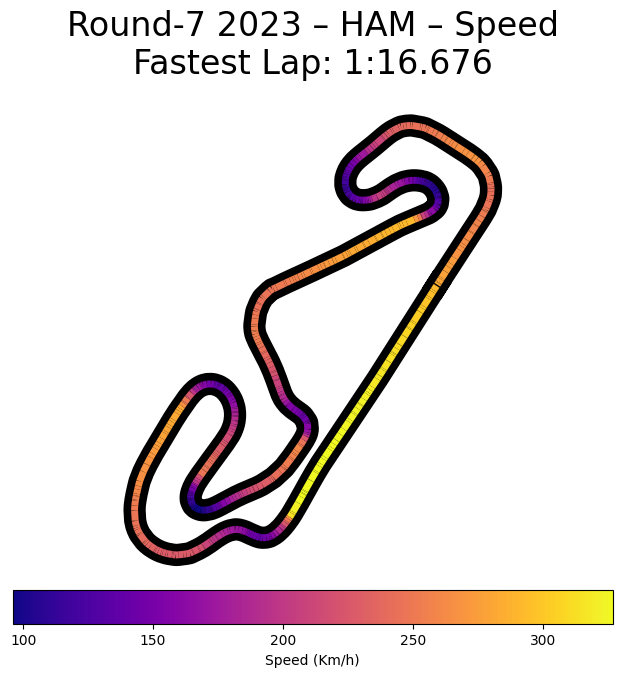

In [8]:
fig, ax = plt.subplots(figsize=(12,6.75))
fig.suptitle(f"Round-{weeknd.name} {year} – {driver} – Speed\n"f"Fastest Lap: {formatted_lap_time}",size=24,y=0.96)

ax.plot(x,y, color='black', linestyle='-', linewidth=16, zorder=0)

norm = plt.Normalize(telemetry['Speed'].min(),telemetry['Speed'].max())
lc = LineCollection(segments,norm=norm, cmap=colormap, linestyle='-', linewidth=5)
lc.set_array(telemetry['Speed'])
ax.add_collection(lc)

cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend=mpl.colors.Normalize(vmin=telemetry['Speed'].min(), vmax = telemetry['Speed'].max())
mpl.colorbar.ColorbarBase(cbaxes, cmap=colormap, norm=normlegend, orientation='horizontal', label="Speed (Km/h)")

ax.set_aspect('equal', adjustable='box')
ax.axis('off')
plt.subplots_adjust(left=0.1,right=0.9,top=0.82,bottom=0.12)